# My investing Journey since I started 2 years ago performance analysis
Modern portfolio theory (MPT) is a theory on how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. According to the theory, it's possible to construct an "efficient frontier" of optimal portfolios offering the maximum possible expected return for a given level of risk.

MPT shows that an investor can construct a portfolio of multiple assets that will maximize returns for a given level of risk. Likewise, given a desired level of expected return, an investor can construct a portfolio with the lowest possible risk. Based on statistical measures such as variance and correlation, an individual investment's return is less important than how the investment behaves in the context of the entire portfolio.

Source: https://www.investopedia.com/terms/m/modernportfoliotheory.asp

Quantitative Value Investing merges mathematical analysis with the principles of value investing. By doing so, this strategy's purpose is to remove the emotion from investing and cuts through the noise of the market and media to make more rational decisions.

##### Disclosure: Stocks mentioned in this portfolio should not be taken as a recommendation to buy or sell any security, this is not financial advise. This is currently my portfolio performance since the 2 years I have experience with investing which was created for perspective research only, using computational finance strategies for portfolio management. Statistical data within this case study are thoroughly researched and believed to be accurate using Yahoo Finance data package. However, discrepancies can occur with the data provided.  As an investor you should conduct your own research and recheck  for any missing data before making any final decisions regarding buying or selling any stocks. Past performances of stocks mentioned in this portfolio are not a guarantee of future performances. 

## My Holdings Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

pd.options.display.float_format = '{:.2f}'.format

In [2]:
M12_Stocks = pd.read_csv("M12_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]

Gathering stock data from the start of my investing journey to present

In [3]:
M12_Stocks = M12_Stocks.loc["2018-11-26":"2020-9-5"]

In [4]:
M12_Stocks.tail().dropna()

,AAPL,AMZN,BLK,CMG,ENPH,GOOGL,HRL,JNJ,KO,LMT,...,NOC,PEP,PG,PLUG,SHOP,SPGI,SQ,TSLA,V,WM
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.04,3450.96,590.64,1310.28,77.23,1629.53,50.98,153.41,49.53,390.26,...,342.61,139.06,138.33,12.98,1066.42,366.42,159.56,498.32,211.99,113.46
2020-09-01,134.18,3499.12,592.68,1372.22,78.71,1655.08,50.69,151.52,49.12,386.81,...,340.38,138.20,138.18,14.13,1134.32,368.39,166.66,475.05,213.35,113.10
2020-09-02,131.40,3531.45,604.37,1379.03,77.02,1717.39,51.33,153.83,51.19,398.07,...,348.36,142.27,140.51,13.14,1074.59,378.41,162.88,447.37,216.48,113.61
2020-09-03,120.88,3368.00,579.12,1328.73,67.80,1629.51,50.99,149.55,50.48,386.29,...,342.23,139.37,138.26,11.55,1015.70,353.69,152.86,407.00,208.96,111.22
2020-09-04,120.96,3294.62,564.63,1313.73,66.15,1581.21,51.08,148.59,51.04,385.02,...,339.03,138.76,137.96,11.76,973.02,345.18,146.39,418.32,204.66,111.21


This function is used to calculate a summary of daily returns and to create a column for Returns and Risks of the stocks mentioned in the portfolio. I chose 252 because there are usually 252 stock market trading days in a year.

In [5]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

In [6]:
ret = M12_Stocks.pct_change().dropna()
ret.tail().dropna()

,AAPL,AMZN,BLK,CMG,ENPH,GOOGL,HRL,JNJ,KO,LMT,...,NOC,PEP,PG,PLUG,SHOP,SPGI,SQ,TSLA,V,WM
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,0.03,0.01,-0.01,0.01,0.02,-0.01,0.01,-0.00,-0.01,-0.01,...,-0.01,0.00,-0.00,-0.01,0.02,-0.00,0.02,0.13,-0.02,-0.00
2020-09-01,0.04,0.01,0.00,0.05,0.02,0.02,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.00,0.09,0.06,0.01,0.04,-0.05,0.01,-0.00
2020-09-02,-0.02,0.01,0.02,0.00,-0.02,0.04,0.01,0.02,0.04,0.03,...,0.02,0.03,0.02,-0.07,-0.05,0.03,-0.02,-0.06,0.01,0.00
2020-09-03,-0.08,-0.05,-0.04,-0.04,-0.12,-0.05,-0.01,-0.03,-0.01,-0.03,...,-0.02,-0.02,-0.02,-0.12,-0.05,-0.07,-0.06,-0.09,-0.03,-0.02
2020-09-04,0.00,-0.02,-0.03,-0.01,-0.02,-0.03,0.00,-0.01,0.01,-0.00,...,-0.01,-0.00,-0.00,0.02,-0.04,-0.02,-0.04,0.03,-0.02,-0.00


In [7]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,0.66,0.38
AMZN,0.47,0.33
BLK,0.28,0.38
CMG,0.67,0.41
ENPH,1.84,0.92
GOOGL,0.28,0.33
HRL,0.12,0.26
JNJ,0.09,0.26
KO,0.10,0.28
LMT,0.23,0.33


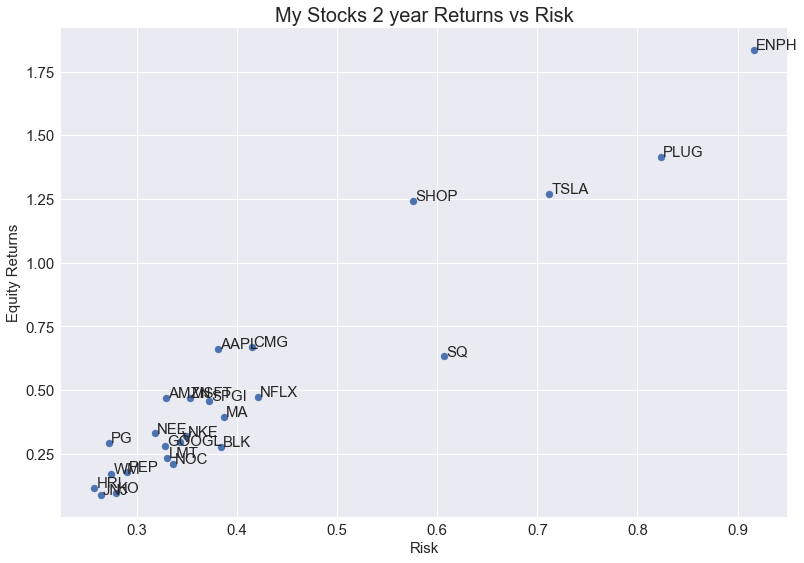

In [8]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Risk", fontsize = 15)
plt.ylabel("Equity Returns", fontsize = 15)
plt.title("My Stocks 2 year Returns vs Risk", fontsize = 20)
plt.show()

## My Holdings Analysis With The Sharpe Ratio

Sharpe Ratio is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

Since the Portfolio is from November 26 2018 to Septemeber 4 2020, we're going to be using the 3 month government bond as the Risk Free Rate, which is at 0.10% during the time of this case study when I checked the treasury yield, The treasury yields are subjected to change. https://www.bloomberg.com/markets/rates-bonds/government-bonds/us use this website to track the treasury yields.

Risk Free Rate:

In theory, the risk-free rate is the minimum return an investor expects for any investment because he will not accept additional risk unless the potential rate of return is greater than the risk-free rate. In practice, however, the risk-free rate does not exist because even the safest investments carry a very small amount of risk. Thus, the interest rate on a three-month U.S. Treasury bill is often used as the risk-free rate for U.S.-based investors.
https://www.investopedia.com/terms/r/risk-freerate.asp

In [9]:
risk_free_return = 0.0010
risk_free_risk = 0

In [10]:
rf = [risk_free_return, risk_free_risk]
rf

[0.001, 0]

In [11]:
summary["Sharpe Ratio"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe Ratio
AAPL,0.66,0.38,1.73
AMZN,0.47,0.33,1.42
BLK,0.28,0.38,0.71
CMG,0.67,0.41,1.61
ENPH,1.84,0.92,2.00
GOOGL,0.28,0.33,0.86
HRL,0.12,0.26,0.44
JNJ,0.09,0.26,0.34
KO,0.10,0.28,0.34
LMT,0.23,0.33,0.70


Stock Sharpe Ratio Analysis: Stocks with positive sharpe ratios, we're expecting postive performances. Stocks with negative sharpe ratios we're expecting negative performances

## Portfolio Sharpe Ratio 
Applying the statisitics module to find the mean of the sharpe ratios to determine the portfolo sharpe ratio. Throughout this project I apply the module to determine the portfolio beta and alpha value.

In [12]:
import statistics

In [13]:
Sharpe = [1.73, 1.42, 0.71, 1.61, 2.00, 0.86, 0.44, 0.34, 0.34, 0.70, 1.02, 1.33, 1.03, 1.12, 0.91, 0.63, 0.61, 1.07, 1.72, 
         2.16, 1.22, 1.04, 1.78, 0.86, 0.61] 
Sharpe = statistics.mean(Sharpe)

In [14]:
print("Portfolio Sharpe Ratio is :", Sharpe) 

Portfolio Sharpe Ratio is : 1.0904


Usually, any Sharpe ratio greater than 1.0 is considered acceptable to be good by investors. A ratio higher than 2.0 is rated as very good. A ratio of 3.0 or higher is considered excellent.

source: https://www.investopedia.com/ask/answers/010815/what-good-sharpe-ratio.asp

## Portfolio Allocations Return vs Risk of My Holdings 
Asset allocation is an investment strategy that aims to balance risk and reward by apportioning a portfolio's assets according to an individual's goals, risk tolerance, and investment horizon. 

### Portfolio Return

In [15]:
M12_Stocks.tail().dropna()

,AAPL,AMZN,BLK,CMG,ENPH,GOOGL,HRL,JNJ,KO,LMT,...,NOC,PEP,PG,PLUG,SHOP,SPGI,SQ,TSLA,V,WM
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.04,3450.96,590.64,1310.28,77.23,1629.53,50.98,153.41,49.53,390.26,...,342.61,139.06,138.33,12.98,1066.42,366.42,159.56,498.32,211.99,113.46
2020-09-01,134.18,3499.12,592.68,1372.22,78.71,1655.08,50.69,151.52,49.12,386.81,...,340.38,138.20,138.18,14.13,1134.32,368.39,166.66,475.05,213.35,113.10
2020-09-02,131.40,3531.45,604.37,1379.03,77.02,1717.39,51.33,153.83,51.19,398.07,...,348.36,142.27,140.51,13.14,1074.59,378.41,162.88,447.37,216.48,113.61
2020-09-03,120.88,3368.00,579.12,1328.73,67.80,1629.51,50.99,149.55,50.48,386.29,...,342.23,139.37,138.26,11.55,1015.70,353.69,152.86,407.00,208.96,111.22
2020-09-04,120.96,3294.62,564.63,1313.73,66.15,1581.21,51.08,148.59,51.04,385.02,...,339.03,138.76,137.96,11.76,973.02,345.18,146.39,418.32,204.66,111.21


In [16]:
returns = (M12_Stocks / M12_Stocks.shift(1)) - 1
returns.tail().dropna()

,AAPL,AMZN,BLK,CMG,ENPH,GOOGL,HRL,JNJ,KO,LMT,...,NOC,PEP,PG,PLUG,SHOP,SPGI,SQ,TSLA,V,WM
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,0.03,0.01,-0.01,0.01,0.02,-0.01,0.01,-0.00,-0.01,-0.01,...,-0.01,0.00,-0.00,-0.01,0.02,-0.00,0.02,0.13,-0.02,-0.00
2020-09-01,0.04,0.01,0.00,0.05,0.02,0.02,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.00,0.09,0.06,0.01,0.04,-0.05,0.01,-0.00
2020-09-02,-0.02,0.01,0.02,0.00,-0.02,0.04,0.01,0.02,0.04,0.03,...,0.02,0.03,0.02,-0.07,-0.05,0.03,-0.02,-0.06,0.01,0.00
2020-09-03,-0.08,-0.05,-0.04,-0.04,-0.12,-0.05,-0.01,-0.03,-0.01,-0.03,...,-0.02,-0.02,-0.02,-0.12,-0.05,-0.07,-0.06,-0.09,-0.03,-0.02
2020-09-04,0.00,-0.02,-0.03,-0.01,-0.02,-0.03,0.00,-0.01,0.01,-0.00,...,-0.01,-0.00,-0.00,0.02,-0.04,-0.02,-0.04,0.03,-0.02,-0.00


When I first started my portfolio was equally weighted and I made sure to rebalance the portfolio to keep the equally weights

In [17]:
weights = np.array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
                   0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04])

In [18]:
allo_returns = returns.mean() * 252
allo_returns

AAPL    0.66
AMZN    0.47
BLK     0.28
CMG     0.67
ENPH    1.84
GOOGL   0.28
HRL     0.12
JNJ     0.09
KO      0.10
LMT     0.23
MA      0.39
MSFT    0.47
NEE     0.33
NFLX    0.47
NKE     0.32
NOC     0.21
PEP     0.18
PG      0.29
PLUG    1.41
SHOP    1.24
SPGI    0.46
SQ      0.63
TSLA    1.27
V       0.30
WM      0.17
dtype: float64

In [19]:
np.dot(allo_returns, weights)

0.514788978905383

In [20]:
pfolio_1 = str(round(np.dot(allo_returns, weights), 5) * 100) + ' %'
print ("Portfolio Return is :", pfolio_1)

Portfolio Return is : 51.479 %


### Portfolio Risk

In [21]:
Port_returns = np.log(M12_Stocks / M12_Stocks.shift(1) )

In [22]:
Port_returns[['AAPL', 'AMZN', 'BLK', 'CMG', 'ENPH', 'GOOGL', 'HRL', 'JNJ', 'KO', 'LMT', 'MA', 'MSFT', 'NEE', 'NFLX', 'NKE', 
          'NOC', 'PEP', 'PG', 'PLUG', 'SHOP', 'SPGI', 'SQ', 'TSLA', 'V', 'WM']].mean() * 252

AAPL    0.59
AMZN    0.41
BLK     0.20
CMG     0.58
ENPH    1.42
GOOGL   0.23
HRL     0.08
JNJ     0.05
KO      0.06
LMT     0.18
MA      0.32
MSFT    0.41
NEE     0.28
NFLX    0.38
NKE     0.26
NOC     0.16
PEP     0.13
PG      0.26
PLUG    1.08
SHOP    1.08
SPGI    0.39
SQ      0.44
TSLA    1.01
V       0.24
WM      0.13
dtype: float64

In [23]:
Port_returns[['AAPL', 'AMZN', 'BLK', 'CMG', 'ENPH', 'GOOGL', 'HRL', 'JNJ', 'KO', 'LMT', 'MA', 'MSFT', 'NEE', 'NFLX', 'NKE', 
          'NOC', 'PEP', 'PG', 'PLUG', 'SHOP', 'SPGI', 'SQ', 'TSLA', 'V', 'WM']].std() * 252 ** 0.5

AAPL    0.38
AMZN    0.33
BLK     0.38
CMG     0.41
ENPH    0.90
GOOGL   0.33
HRL     0.26
JNJ     0.26
KO      0.28
LMT     0.33
MA      0.39
MSFT    0.35
NEE     0.32
NFLX    0.42
NKE     0.35
NOC     0.34
PEP     0.29
PG      0.27
PLUG    0.81
SHOP    0.58
SPGI    0.37
SQ      0.62
TSLA    0.71
V       0.34
WM      0.28
dtype: float64

Covariance measures the directional relationship between the returns on two assets. A positive covariance means that asset returns move together while a negative covariance means they move inversely.

In [24]:
cov_matrix = Port_returns.cov()

In [25]:
cov_matrix_a = Port_returns.cov() * 252

Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.

In [26]:
corr_matrix = Port_returns.corr()

In [27]:
weights = np.array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
                   0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04])

Portfolio Variance is a measure of the dispersion of returns of a portfolio. It is the aggregate of the actual returns of a given portfolio over a set period of time. Modern portfolio theory (MPT) states that portfolio variance can be reduced by selecting securities with low or negative correlations in which to invest, such as stocks and bonds.

In [28]:
pfolio_var = np.dot(weights.T, np.dot(Port_returns.cov() * 252, weights))
pfolio_var

0.08217288181992136

Portfolio Volatility is a measure of how wildly the total value of all the stocks in that portfolio appreciates or declines.

In [29]:
pfolio_vol = (np.dot(weights.T, np.dot(Port_returns.cov() * 252, weights))) ** 0.5
pfolio_vol

0.2866581270780952

In [30]:
print ("Portfolio Risk is :", (str(round(pfolio_vol, 5) * 100) + ' %'))

Portfolio Risk is : 28.666000000000004 %


## Portfolio Return vs Risk Analysis: 

Throughout my 2 years of investing, applying skills I learned in financial accounting and Udemy courses on Financial Analysis and Investment Fundamentals which have helped me understand the importance of fundamental analysis. I have been able to successfully build a pretty well diverse portfolio making sure all stocks mention have strong balance sheets and stocks that I personally believe will do great things. My portfolio return throughout the 2 years is 54.85% with a risk of 28.49% as we can see the Portfolio return is greater than the risk. 




## Including the Market Portfolio (S&P 500 Index) For portfolio analysis 

A market portfolio is a theoretical bundle of investments that includes every type of asset available in the investment universe, with each asset weighted in proportion to its total presence in the market. The expected return of a market portfolio is identical to the expected return of the market as a whole.

A market portfolio, by nature of being completely diversified, is subject only to systematic risk, or risk that affects the market as a whole, and not to unsystematic risk, which is the risk inherent to a particular asset class. In this case study we will be using the S&P 500 Index as the Market Portfolio which will also serve as a benchmark. https://www.investopedia.com

In [31]:
M12_Stocks = pd.read_csv("M12_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]
SP500_Index =  pd.read_csv("SP500.csv", index_col = "Date", parse_dates = ["Date"])["Adj Close"].to_frame()

In [32]:
M12_Stocks = M12_Stocks.loc["2018-11-26":"2020-9-5"]
SP500_Index = SP500_Index.loc["2018-11-26":"2020-9-5"]

In [33]:
M12_Stocks["MP"] = SP500_Index["Adj Close"]

In [34]:
M12_Stocks.tail().dropna()

,AAPL,AMZN,BLK,CMG,ENPH,GOOGL,HRL,JNJ,KO,LMT,...,PEP,PG,PLUG,SHOP,SPGI,SQ,TSLA,V,WM,MP
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.04,3450.96,590.64,1310.28,77.23,1629.53,50.98,153.41,49.53,390.26,...,139.06,138.33,12.98,1066.42,366.42,159.56,498.32,211.99,113.46,3500.31
2020-09-01,134.18,3499.12,592.68,1372.22,78.71,1655.08,50.69,151.52,49.12,386.81,...,138.20,138.18,14.13,1134.32,368.39,166.66,475.05,213.35,113.10,3526.65
2020-09-02,131.40,3531.45,604.37,1379.03,77.02,1717.39,51.33,153.83,51.19,398.07,...,142.27,140.51,13.14,1074.59,378.41,162.88,447.37,216.48,113.61,3580.84
2020-09-03,120.88,3368.00,579.12,1328.73,67.80,1629.51,50.99,149.55,50.48,386.29,...,139.37,138.26,11.55,1015.70,353.69,152.86,407.00,208.96,111.22,3455.06
2020-09-04,120.96,3294.62,564.63,1313.73,66.15,1581.21,51.08,148.59,51.04,385.02,...,138.76,137.96,11.76,973.02,345.18,146.39,418.32,204.66,111.21,3426.96


In [35]:
ret = M12_Stocks.pct_change().dropna() 
# ret, when inputting "ret" it'll bring up a list of the daily returns

In [36]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

In [37]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,0.66,0.38
AMZN,0.47,0.33
BLK,0.28,0.38
CMG,0.67,0.41
ENPH,1.84,0.92
GOOGL,0.28,0.33
HRL,0.12,0.26
JNJ,0.09,0.26
KO,0.10,0.28
LMT,0.23,0.33


In [38]:
risk_free_return = 0.0010
risk_free_risk = 0

In [39]:
rf = [risk_free_return, risk_free_risk]
rf

[0.001, 0]

In [40]:
summary["Sharpe Ratio"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe Ratio
AAPL,0.66,0.38,1.73
AMZN,0.47,0.33,1.42
BLK,0.28,0.38,0.71
CMG,0.67,0.41,1.61
ENPH,1.84,0.92,2.00
GOOGL,0.28,0.33,0.86
HRL,0.12,0.26,0.44
JNJ,0.09,0.26,0.34
KO,0.10,0.28,0.34
LMT,0.23,0.33,0.70


Notice that the Market Porfolo has a Positive sharpe ratio, this generally moves we're expecting positive performance.

## Systematic and Unsystematic Risk  Including the Market Portfolio

Systematic risk refers to the risk inherent to the entire market or market segment. Systematic risk, also known as “undiversifiable risk,” “volatility” or “market risk,” affects the overall market, not just a particular stock or industry. This type of risk is both unpredictable and impossible to completely avoid. It cannot be mitigated through diversification, only through hedging or by using the correct asset allocation strategy.

Unsystematic risk is unique to a specific company or industry. Also known as “nonsystematic risk,” "specific risk," "diversifiable risk" or "residual risk," in the context of an investment portfolio, unsystematic risk can be reduced through diversification.

Variance is used to compare the relative performance of each asset in a portfolio:

In [41]:
summary["TotalRisk_Variance"] = np.power(summary.Risk, 2)
summary

,Return,Risk,Sharpe Ratio,TotalRisk_Variance
AAPL,0.66,0.38,1.73,0.15
AMZN,0.47,0.33,1.42,0.11
BLK,0.28,0.38,0.71,0.15
CMG,0.67,0.41,1.61,0.17
ENPH,1.84,0.92,2.00,0.84
GOOGL,0.28,0.33,0.86,0.11
HRL,0.12,0.26,0.44,0.07
JNJ,0.09,0.26,0.34,0.07
KO,0.10,0.28,0.34,0.08
LMT,0.23,0.33,0.70,0.11


In statistics, covariance is a metric used to measure how one random variable moves in relation to another random variable. In investment, covariance of returns measures how the rate of return on one asset varies in relation to the rate of return on other assets or a portfolio.

In [42]:
COV = ret.cov()*252
# COV, if we add "COV" it'll create a long chart

In [43]:
summary["SystRisk_Variance"] = COV.iloc[:, -1]

In [44]:
summary["UnsystRisk_Variance"] = summary["TotalRisk_Variance"].sub(summary["SystRisk_Variance"])
summary

,Return,Risk,Sharpe Ratio,TotalRisk_Variance,SystRisk_Variance,UnsystRisk_Variance
AAPL,0.66,0.38,1.73,0.15,0.09,0.06
AMZN,0.47,0.33,1.42,0.11,0.06,0.05
BLK,0.28,0.38,0.71,0.15,0.09,0.06
CMG,0.67,0.41,1.61,0.17,0.06,0.11
ENPH,1.84,0.92,2.00,0.84,0.11,0.73
GOOGL,0.28,0.33,0.86,0.11,0.07,0.03
HRL,0.12,0.26,0.44,0.07,0.03,0.03
JNJ,0.09,0.26,0.34,0.07,0.05,0.02
KO,0.10,0.28,0.34,0.08,0.06,0.02
LMT,0.23,0.33,0.70,0.11,0.06,0.04


### Systematic and Unsystematic risk of stocks including the Market Portfolio (MP = S&P500 Index):

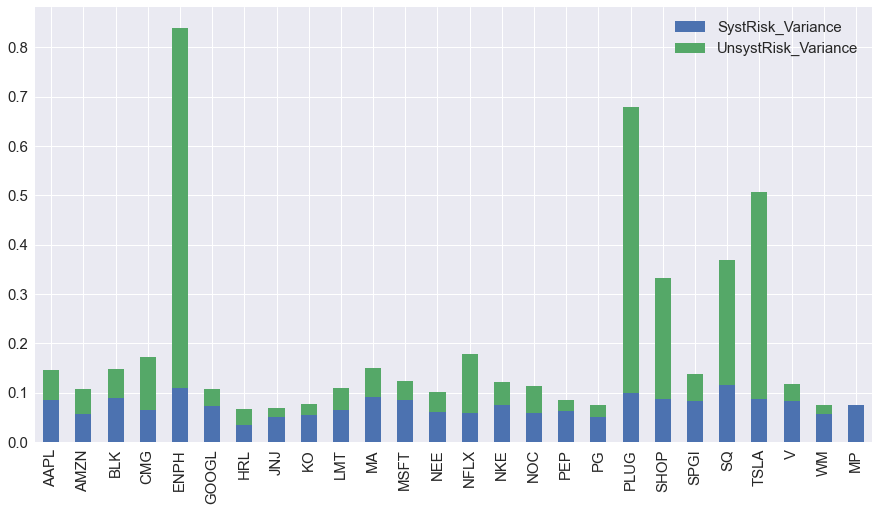

In [45]:
summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### Determining the Beta of stocks in the portfolio compared to the Market Portfolio (S&P 500 Index):

Beta is a measure of the volatility (Risk), or systematic risk, of a security or portfolio, in comparison to the market as a whole. 

In [46]:
summary["beta"] = summary.SystRisk_Variance / summary.loc["MP", "SystRisk_Variance"]
summary

,Return,Risk,Sharpe Ratio,TotalRisk_Variance,SystRisk_Variance,UnsystRisk_Variance,beta
AAPL,0.66,0.38,1.73,0.15,0.09,0.06,1.16
AMZN,0.47,0.33,1.42,0.11,0.06,0.05,0.78
BLK,0.28,0.38,0.71,0.15,0.09,0.06,1.20
CMG,0.67,0.41,1.61,0.17,0.06,0.11,0.86
ENPH,1.84,0.92,2.00,0.84,0.11,0.73,1.47
GOOGL,0.28,0.33,0.86,0.11,0.07,0.03,0.99
HRL,0.12,0.26,0.44,0.07,0.03,0.03,0.45
JNJ,0.09,0.26,0.34,0.07,0.05,0.02,0.68
KO,0.10,0.28,0.34,0.08,0.06,0.02,0.75
LMT,0.23,0.33,0.70,0.11,0.06,0.04,0.86


## Portfolio Beta 
not including the MP which is the S&P 500 index

In [47]:
import statistics

In [48]:
Beta = [1.16, 0.78, 1.20, 0.86, 1.47, 0.99, 0.45, 0.68, 0.75, 0.86, 1.23, 1.14, 0.83, 0.80, 1.01, 0.80, 0.84, 0.70, 1.33, 
       1.18, 1.13, 1.55, 1.19, 1.13, 0.76] 
Beta = statistics.mean(Beta)

In [49]:
print("Portfolio Beta is :", Beta) 

Portfolio Beta is : 0.9928


Portfolio Beta Analysis: with a portfolio beta of 0.99 this represents that the portfolio has a close correlation with the S&P 500 benchmark performance. 

## Determining The Security Market Line For Equities Portfolio Section

The security market line is an investment evaluation tool derived from the CAPM—a model that describes risk-return relationship for securities—and is based on the assumption that investors need to be compensated for both the time value of money (TVM) and the corresponding level of risk associated with any investment, referred to as the risk premium.

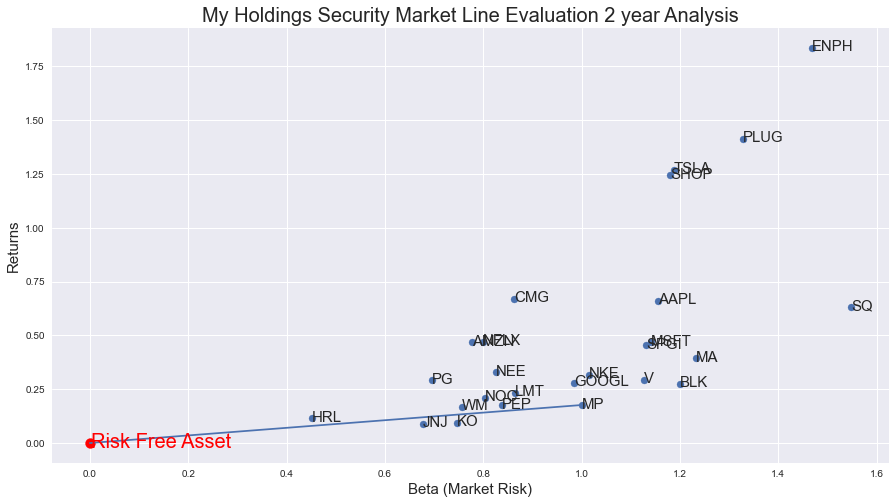

In [50]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["MP", "beta"]], [rf[0], summary.loc["MP", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "red")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "Red")
plt.xlabel("Beta (Market Risk)", fontsize = 15)
plt.ylabel("Returns", fontsize = 15)
plt.title("My Holdings Security Market Line Evaluation 2 year Analysis", fontsize = 20)
plt.show()

Security Market Line Analysis: Stocks that fall below the SML is an indictor that they are underperforming the market. Meanwhile stocks above the SML indicate that they are outperforming the market. Stocks that are underperforming the market also have negative alpha values.

Stocks with the beta above 1, means that they get largely affected by market condidtions in a postive and a negative way due to systematic risk. If the S&P 500 were to drop around 5%, these stocks would be likely to drop towards 8 to 10% in a day and if the S&P500 would of rallyed 5% then those stocks would gained 8 to 10% in a day. In other words high beta stock tend to have more risk, with greater risk comes greater potential reward. 

### Including the Capital Asset Pricing Model and Alpha of the stocks with the Market Portfolio

The Capital Asset Pricing Model (CAPM) describes the relationship between systematic risk and expected return for assets, particularly stocks. CAPM is widely used throughout finance for pricing risky securities and generating expected returns for assets given the risk of those assets and cost of capital.

"Alpha" (the Greek letter α) is a term used in investing to describe a strategy's ability to beat the market, or it's "edge." Alpha is thus also often referred to as “excess return” or “abnormal rate of return,” which refers to the idea that markets are efficient, and so there is no way to systematically earn returns that exceed the broad market as a whole. Alpha is often used in conjunction with beta (the Greek letter β) , which measures the broad market's overall volatility or risk, known as systematic market risk

In [51]:
summary["CAPM_Ret"] = rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.beta

In [52]:
summary["Alpha Value"] = summary.Return - summary.CAPM_Ret
summary

,Return,Risk,Sharpe Ratio,TotalRisk_Variance,SystRisk_Variance,UnsystRisk_Variance,beta,CAPM_Ret,Alpha Value
AAPL,0.66,0.38,1.73,0.15,0.09,0.06,1.16,0.20,0.46
AMZN,0.47,0.33,1.42,0.11,0.06,0.05,0.78,0.14,0.33
BLK,0.28,0.38,0.71,0.15,0.09,0.06,1.20,0.21,0.06
CMG,0.67,0.41,1.61,0.17,0.06,0.11,0.86,0.15,0.52
ENPH,1.84,0.92,2.00,0.84,0.11,0.73,1.47,0.26,1.58
GOOGL,0.28,0.33,0.86,0.11,0.07,0.03,0.99,0.17,0.11
HRL,0.12,0.26,0.44,0.07,0.03,0.03,0.45,0.08,0.03
JNJ,0.09,0.26,0.34,0.07,0.05,0.02,0.68,0.12,-0.03
KO,0.10,0.28,0.34,0.08,0.06,0.02,0.75,0.13,-0.04
LMT,0.23,0.33,0.70,0.11,0.06,0.04,0.86,0.15,0.08


CAPM Analysis of Equities: Since we know that the CAPM is used for determining expected returns on stocks, we can notice that each stock is expected to reach positve returns, We can also notice that stocks with the highest betas are expected to have higher returns. This could of course change do to systematic condidtons.  

Alpha Analysis of Equities: Understanding that Alpha is used to determine whether or not a stock would beat the overall market. We can notice that stocks in the Portfolio that have a chance of not beating the over all market are the stocks below the Security Market Line which have a negative alpha value.

## Portfolio Alpha Value
not including the MP which is the S&P 500 index

In [53]:
Alpha = [0.46, 0.33, 0.06, 0.52, 1.58, 0.11, 0.03, -0.03, -0.04, 0.08, 0.18, 0.27, 0.18, 0.33, 0.14, 0.07, 0.03, 0.17, 1.18,
        1.03, 0.26, 0.36, 1.06, 0.10, 0.04] 
Alpha = statistics.mean(Alpha)

In [54]:
print ("Portfolio Alpha is :", (str(round(Alpha, 5) * 100) + ' %'))

Portfolio Alpha is : 34.0 %


Portfolio Alpha value represents my portfolio is outperforming the S&P 500 by 34%

# My Portfolio Visual Indexes Performances 

## Price Weighted Index (Portfolio)
A price-weighted index is an index in which the member companies are weighted in proportion to their price per share, rather than by number of shares outstanding, market capitalization or other factors.

In [55]:
M12_Stocks = pd.read_csv("M12_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Close"]

In [56]:
M12_Stocks.tail().dropna()

,AAPL,AMZN,BLK,CMG,ENPH,GOOGL,HRL,JNJ,KO,LMT,...,NOC,PEP,PG,PLUG,SHOP,SPGI,SQ,TSLA,V,WM
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.04,3450.96,594.19,1310.28,77.23,1629.53,50.98,153.41,49.53,390.26,...,342.61,140.06,138.33,12.98,1066.42,366.42,159.56,498.32,211.99,114.00
2020-09-01,134.18,3499.12,596.24,1372.22,78.71,1655.08,50.69,151.52,49.12,386.81,...,340.38,139.19,138.18,14.13,1134.32,368.39,166.66,475.05,213.35,113.64
2020-09-02,131.40,3531.45,608.00,1379.03,77.02,1717.39,51.33,153.83,51.19,398.07,...,348.36,143.29,140.51,13.14,1074.59,378.41,162.88,447.37,216.48,114.15
2020-09-03,120.88,3368.00,579.12,1328.73,67.80,1629.51,50.99,149.55,50.48,386.29,...,342.23,139.37,138.26,11.55,1015.70,353.69,152.86,407.00,208.96,111.22
2020-09-04,120.96,3294.62,564.63,1313.73,66.15,1581.21,51.08,148.59,51.04,385.02,...,339.03,138.76,137.96,11.76,973.02,345.18,146.39,418.32,204.66,111.21


The Purpose of normalzing the data to 100 is to give a better comparison of the performance of each stock in the portfolio. Normalzig the data to a value of 100 in our situations reprents $100 in each stock

In [57]:
norm = M12_Stocks.div(M12_Stocks.iloc[0]).mul(100)
norm.dropna()

,AAPL,AMZN,BLK,CMG,ENPH,GOOGL,HRL,JNJ,KO,LMT,...,NOC,PEP,PG,PLUG,SHOP,SPGI,SQ,TSLA,V,WM
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-26,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2018-11-27,99.78,100.01,99.68,101.59,100.38,99.65,98.42,101.31,101.02,100.00,...,97.91,100.50,100.85,101.73,100.02,99.80,99.04,99.40,99.98,99.97
2018-11-28,103.62,106.10,102.10,105.26,105.09,103.40,98.21,103.59,101.72,101.58,...,98.96,102.28,101.16,102.89,103.82,103.26,105.07,100.54,104.00,101.50
2018-11-29,102.82,105.83,101.06,103.55,102.26,103.66,98.95,103.17,100.23,102.42,...,98.03,102.08,100.96,102.31,103.18,101.66,105.08,98.60,102.32,101.40
2018-11-30,102.27,106.88,102.27,101.54,101.89,105.09,98.64,103.91,103.13,101.74,...,97.74,105.25,102.80,101.16,105.69,103.08,104.99,101.29,104.24,102.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,295.59,218.23,141.98,281.16,1457.17,154.32,111.53,108.52,101.35,132.17,...,128.85,120.89,150.46,750.29,738.31,206.55,239.87,720.12,155.94,124.67
2020-09-01,307.36,221.28,142.47,294.46,1485.09,156.74,110.89,107.18,100.51,131.00,...,128.01,120.14,150.29,816.76,785.32,207.66,250.54,686.49,156.94,124.28
2020-09-02,301.00,223.32,145.28,295.92,1453.21,162.64,112.29,108.81,104.75,134.81,...,131.01,123.68,152.83,759.54,743.97,213.31,244.86,646.49,159.25,124.84


In [58]:
norm['PWI'] = M12_Stocks.sum(axis =1).div(M12_Stocks.sum(axis =1)[0]).mul(100)

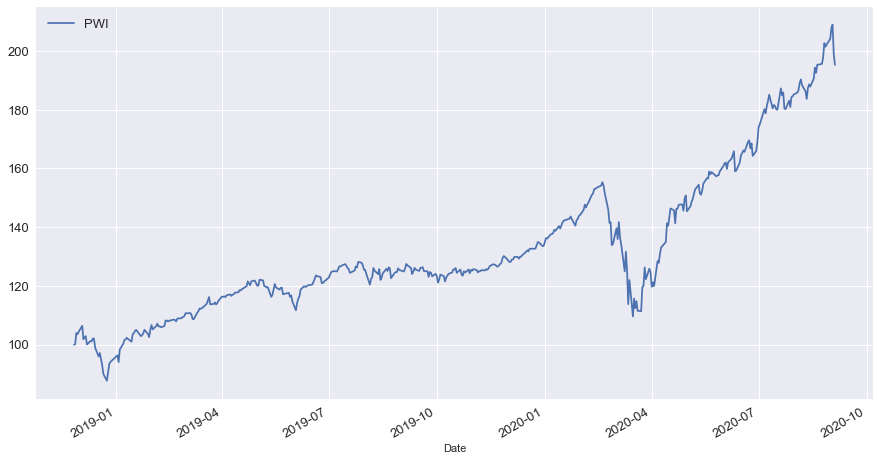

In [59]:
norm.loc[:, ['PWI']].plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Equally Weighted Index (Portfolio)
An equal-weighted index is a stock market index – comprised of a group of publicly traded companies. – that invests an equal amount of money in the stock of each company that makes up the index.

In [60]:
ret = M12_Stocks.pct_change().dropna()
ret.head()

,AAPL,AMZN,BLK,CMG,ENPH,GOOGL,HRL,JNJ,KO,LMT,...,NOC,PEP,PG,PLUG,SHOP,SPGI,SQ,TSLA,V,WM
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-27,-0.00,0.00,-0.00,0.02,0.00,-0.00,-0.02,0.01,0.01,0.00,...,-0.02,0.01,0.01,0.02,0.00,-0.00,-0.01,-0.01,-0.00,-0.00
2018-11-28,0.04,0.06,0.02,0.04,0.05,0.04,-0.00,0.02,0.01,0.02,...,0.01,0.02,0.00,0.01,0.04,0.03,0.06,0.01,0.04,0.02
2018-11-29,-0.01,-0.00,-0.01,-0.02,-0.03,0.00,0.01,-0.00,-0.01,0.01,...,-0.01,-0.00,-0.00,-0.01,-0.01,-0.02,0.00,-0.02,-0.02,-0.00
2018-11-30,-0.01,0.01,0.01,-0.02,-0.00,0.01,-0.00,0.01,0.03,-0.01,...,-0.00,0.03,0.02,-0.01,0.02,0.01,-0.00,0.03,0.02,0.01
2018-12-03,0.03,0.05,0.02,0.00,0.07,0.01,0.01,-0.00,-0.01,-0.01,...,0.01,-0.02,-0.01,-0.03,0.02,0.01,0.03,0.02,0.02,-0.01


In [61]:
ret['Mean_ret'] = ret.mean(axis = 1)
ret.head()

,AAPL,AMZN,BLK,CMG,ENPH,GOOGL,HRL,JNJ,KO,LMT,...,PEP,PG,PLUG,SHOP,SPGI,SQ,TSLA,V,WM,Mean_ret
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-27,-0.00,0.00,-0.00,0.02,0.00,-0.00,-0.02,0.01,0.01,0.00,...,0.01,0.01,0.02,0.00,-0.00,-0.01,-0.01,-0.00,-0.00,0.00
2018-11-28,0.04,0.06,0.02,0.04,0.05,0.04,-0.00,0.02,0.01,0.02,...,0.02,0.00,0.01,0.04,0.03,0.06,0.01,0.04,0.02,0.03
2018-11-29,-0.01,-0.00,-0.01,-0.02,-0.03,0.00,0.01,-0.00,-0.01,0.01,...,-0.00,-0.00,-0.01,-0.01,-0.02,0.00,-0.02,-0.02,-0.00,-0.01
2018-11-30,-0.01,0.01,0.01,-0.02,-0.00,0.01,-0.00,0.01,0.03,-0.01,...,0.03,0.02,-0.01,0.02,0.01,-0.00,0.03,0.02,0.01,0.01
2018-12-03,0.03,0.05,0.02,0.00,0.07,0.01,0.01,-0.00,-0.01,-0.01,...,-0.02,-0.01,-0.03,0.02,0.01,0.03,0.02,0.02,-0.01,0.01


In [62]:
norm['My Portfolio'] = 100
norm.head()

,AAPL,AMZN,BLK,CMG,ENPH,GOOGL,HRL,JNJ,KO,LMT,...,PG,PLUG,SHOP,SPGI,SQ,TSLA,V,WM,PWI,My Portfolio
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-26,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100
2018-11-27,99.78,100.01,99.68,101.59,100.38,99.65,98.42,101.31,101.02,100.00,...,100.85,101.73,100.02,99.80,99.04,99.40,99.98,99.97,100.10,100
2018-11-28,103.62,106.10,102.10,105.26,105.09,103.40,98.21,103.59,101.72,101.58,...,101.16,102.89,103.82,103.26,105.07,100.54,104.00,101.50,103.94,100
2018-11-29,102.82,105.83,101.06,103.55,102.26,103.66,98.95,103.17,100.23,102.42,...,100.96,102.31,103.18,101.66,105.08,98.60,102.32,101.40,103.53,100
2018-11-30,102.27,106.88,102.27,101.54,101.89,105.09,98.64,103.91,103.13,101.74,...,102.80,101.16,105.69,103.08,104.99,101.29,104.24,102.53,104.38,100


In [63]:
norm.iloc[1:, -1] = ret.Mean_ret.add(1).cumprod().mul(100)
norm

,AAPL,AMZN,BLK,CMG,ENPH,GOOGL,HRL,JNJ,KO,LMT,...,PG,PLUG,SHOP,SPGI,SQ,TSLA,V,WM,PWI,My Portfolio
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-26,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2018-11-27,99.78,100.01,99.68,101.59,100.38,99.65,98.42,101.31,101.02,100.00,...,100.85,101.73,100.02,99.80,99.04,99.40,99.98,99.97,100.10,100.16
2018-11-28,103.62,106.10,102.10,105.26,105.09,103.40,98.21,103.59,101.72,101.58,...,101.16,102.89,103.82,103.26,105.07,100.54,104.00,101.50,103.94,103.01
2018-11-29,102.82,105.83,101.06,103.55,102.26,103.66,98.95,103.17,100.23,102.42,...,100.96,102.31,103.18,101.66,105.08,98.60,102.32,101.40,103.53,102.33
2018-11-30,102.27,106.88,102.27,101.54,101.89,105.09,98.64,103.91,103.13,101.74,...,102.80,101.16,105.69,103.08,104.99,101.29,104.24,102.53,104.38,103.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,295.59,218.23,141.98,281.16,1457.17,154.32,111.53,108.52,101.35,132.17,...,150.46,750.29,738.31,206.55,239.87,720.12,155.94,124.67,204.06,236.20
2020-09-01,307.36,221.28,142.47,294.46,1485.09,156.74,110.89,107.18,100.51,131.00,...,150.29,816.76,785.32,207.66,250.54,686.49,156.94,124.28,207.68,239.25
2020-09-02,301.00,223.32,145.28,295.92,1453.21,162.64,112.29,108.81,104.75,134.81,...,152.83,759.54,743.97,213.31,244.86,646.49,159.25,124.84,208.97,240.42


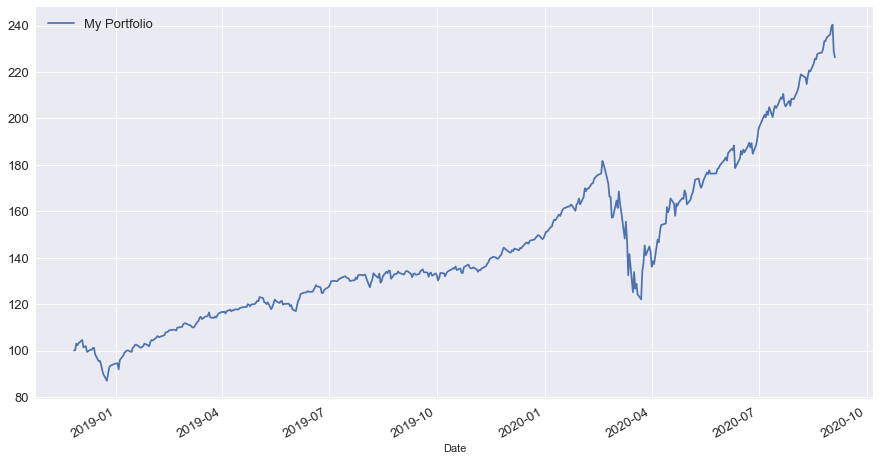

In [64]:
norm.loc[:, ['My Portfolio']].plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

Throughout my 2 years of experience with investing this is what my current equity portfolio looks like, I gave it a base value of 100 to represent $100 invested into the market. I am not going to disclose my actual amount because I feel that is too personal, however just by looking at the performance of my portfolio, it looks like I did a pretty good job within my first 2 years of exposure to the stock market. As an investor we can't ignore the massive growth we witness/obtain. with massive growth must come a future downfall, how we hedge our portfolio during these times will make a huge difference. As of now, I have exposure to both bonds and gold in an attempt to protect my portfolio during market downturns.

We also can not ignore that we are officially in a recession. With the stock market rising and many people seeing massive growth I keep on thinking to my self, "this is too good to be true" which it actually is. Because we still haven't found a vaccine for COVID-19 and yet the market is still rising because it trades on future performances and "hope". I won't be surprise in the next coming months if we still don't have a vaccine and GDP doesn't become positive next quarter then the stock market could potentially see a larger dip then in march 2020 we experienced, as investors we must stay vigilant and take a calculated risk. 

On September 3rd through 4th, the US Stock market has witnessed another correction with many people experiencing losses. A lot of new investors started to get scared and created a sell-off in the market (caused by irrational selling). When in reality this was not a big deal because if you look at this small drop in perspective we experienced something similar back in June and then the market started soaring again shortly right after. These new investors who entered the market joined without understanding that no matter what happens the stock market will eventually experience downturns and corrections. Behavior finance comes to mind during situations like these, if you don't have a long term view of stocks that you are buying then why are you entering the stock market in the first place? 

Investing to me is all about being an owner, to be apart of something. Feeling like you are helping out these companies by giving them that extra capital in return for a small percentage of ownership + dividend payments. One of the best investors ever Peter Lynch once said something along the lines of, if you don't understand the business/industry of the stock then you should not be buying it because then you will just panic whenever there is a market downturn or correction. Peter Lynch and Warren Buffet helped me build my personal investing philosophy and strategy, so far I have seen success. 

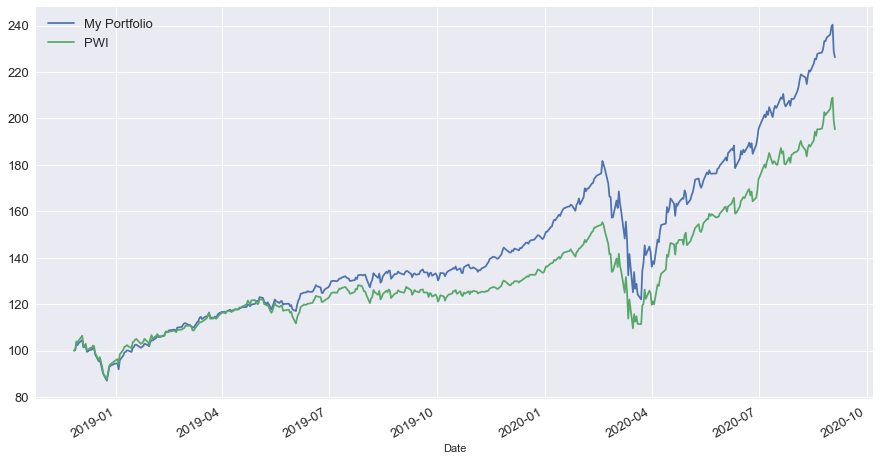

In [65]:
norm.loc[:, ['My Portfolio', 'PWI']].plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()